### Triangle Notebook

#### translation of triangle.nb (mathematica code) provided by U. Schreiber for pre-calculating aligment adjustments of rings of ROMY 

In [1]:
##________________________________________________________
''' importing libraries ... '''

import os, subprocess
#import numpy as np
#import matplotlib.pyplot as plt 


from numpy import sin, cos, tan, sqrt, pi, array, cross, dot
from numpy.linalg import norm
from scipy.optimize import fsolve
from pandas import DataFrame
from math import isclose

' importing libraries ... '

In [2]:
##________________________________________________________
''' setting variables ... '''

# Spherical coordinates vector
def v(_r, _theta, _phi):
    return array([_r*cos(_theta)*sin(_phi), _r*sin(_theta)*sin(_phi), _r*cos(_phi)])

# Mirror curvature radius 
global RC1; RC1 = 12.0
global RC2; RC2 = 12.0
global RC3; RC3 = 12.0

# Nominal length of the sides
global L; L = 12.0;  


Data in input and output are given in spherical coordinates with the origin in the ring center.

In perfect geometry the spots of  laser radiation on the mirrors have coordinates:

{r,0,0}, 
{r,$\frac{2}{3} \pi$,0}, 
{r,$\frac{4}{3} \pi$,0},  

with $r=\frac{L}{\sqrt{3}}$ and $L$ is the side of the square.

The mirror curvature centers have coordinates:

{rc,$\pi$, 0}, 
{rc,-$\pi$/3, 0}, 
{rc,$\pi$/3,0} 

with $rc = RC - L \frac{\sqrt{3}}{3}$.

A translation of a mirror corresponds to an identical translation of its  curvature centers.


# 1. Mirror Curvature Centers  -> Ring Laser Radiation Spots

## Input 

### Evaluation of the ring laser radiation spots

In [3]:
# Mirror curvature centers coordinates - perfect geometry
c1 = RC1 - L * sqrt(3)/3;
c2 = RC2 - L * sqrt(3)/3;
c3 = RC3 - L * sqrt(3)/3;

theta_c1, theta_c2, theta_c3 = [pi, -pi/3, pi/3];

phi_c1, phi_c2, phi_c3 = [pi/2, pi/2, pi/2];

### Evaluation of the Ring laser Radiation Spots

In [4]:
# Define variables and equations

def equations1(vars):
    
    r1, theta1, phi1, r2, theta2, phi2, r3, theta3, phi3 = vars


    # Mirror curvature centers coordinates - perfect geometry
    c1 = RC1 - L * sqrt(3)/3;
    c2 = RC2 - L * sqrt(3)/3;
    c3 = RC3 - L * sqrt(3)/3;

    theta_c1, theta_c2, theta_c3 = [pi, -pi/3, pi/3];

    phi_c1, phi_c2, phi_c3 = [pi/2, pi/2, pi/2];

    # Vectors of the optical path sides in cartesian coordinates
    s12 = v(r2, theta2, phi2) - v(r1, theta1, phi1);
    s23 = v(r3, theta3, phi3) - v(r2, theta2, phi2);
    s31 = v(r1, theta1, phi1) - v(r3, theta3, phi3);

    # Vectors center -> spotring in cartesian coordinates 
    # (their lengths are Rci curvature radius)
    VRc1 = v(r1, theta1, phi1) - v(c1, theta_c1, phi_c1);
    VRc2 = v(r2, theta2, phi2) - v(c2, theta_c2, phi_c2);
    VRc3 = v(r3, theta3, phi3) - v(c3, theta_c3, phi_c3);
    #VRc = array([VRc1, VRc2, VRc3]);
        
    # Constrain 1: SPOT are on a spherical surface with radius Rci
    eq11 = ( norm(VRc1) - RC1 );
    eq12 = ( norm(VRc2) - RC2 );
    eq13 = ( norm(VRc3) - RC3 );
    
    # Constrain 2: reflection law 
    # -> coplanarita raggio incidente- raggio riflesso
    eq21 = ( dot(cross(VRc1, s31),s12) );
    eq22 = ( dot(cross(VRc2, s12),s23) );
    eq23 = ( dot(cross(VRc3, s23),s31) );

    # Constrain 3: reflection law 
    # -> incident angle == reflection angle
    eq31 = ( dot(VRc1, s31)/(norm(VRc1)*norm(s31)) + (dot(s12, VRc1)/(norm(VRc1)*norm(s12))) );
    eq32 = ( dot(VRc2, s12)/(norm(VRc2)*norm(s12)) + (dot(s23, VRc2)/(norm(VRc2)*norm(s23))) );
    eq33 = ( dot(VRc3, s23)/(norm(VRc3)*norm(s23)) + (dot(s31, VRc3)/(norm(VRc3)*norm(s31))) );

    return [eq11, eq12, eq13, eq21, eq22, eq23, eq31, eq32, eq33]

def equations2(vars):
    
    c1, theta_c1, phi_c1, c2, theta_c2, phi_c2, c3, theta_c3, phi_c3 = vars
    

    # Nominal length of the sides
    #L = 12.0;

    # coordinates spot - perfect geometry
    r1, r2, r3 = [L * sqrt(3)/3, L * sqrt(3)/3, L * sqrt(3)/3];

    theta1, theta2, theta3 = [0.0, 2*pi/3, 4*pi/3];

    phi1, phi2, phi3 = [pi/2, pi/2, pi/2];

    # Vectors of the optical path sides in cartesian coordinates
    s12 = v(r2, theta2, phi2) - v(r1, theta1, phi1);
    s23 = v(r3, theta3, phi3) - v(r2, theta2, phi2);
    s31 = v(r1, theta1, phi1) - v(r3, theta3, phi3);
    
    # Vectors center -> spotring in cartesian coordinates 
    # (their lengths are Rci curvature radius)
    VRc1 = v(r1, theta1, phi1) - v(c1, theta_c1, phi_c1);
    VRc2 = v(r2, theta2, phi2) - v(c2, theta_c2, phi_c2);
    VRc3 = v(r3, theta3, phi3) - v(c3, theta_c3, phi_c3);
    #VRc = array([VRc1, VRc2, VRc3]);
        
    # Constrain 1: SPOT are on a spherical surface with radius Rci
    eq11 = ( norm(VRc1) - RC1 );
    eq12 = ( norm(VRc2) - RC2 );
    eq13 = ( norm(VRc3) - RC3 );
    
    # Constrain 2: reflection law 
    # -> coplanarita raggio incidente- raggio riflesso
    eq21 = ( dot(cross(VRc1, s31),s12) );
    eq22 = ( dot(cross(VRc2, s12),s23) );
    eq23 = ( dot(cross(VRc3, s23),s31) );

    # Constrain 3: reflection law 
    # -> incident angle == reflection angle
    eq31 = ( dot(VRc1, s31)/(norm(VRc1)*norm(s31)) + (dot(s12, VRc1)/(norm(VRc1)*norm(s12))) );
    eq32 = ( dot(VRc2, s12)/(norm(VRc2)*norm(s12)) + (dot(s23, VRc2)/(norm(VRc2)*norm(s23))) );
    eq33 = ( dot(VRc3, s23)/(norm(VRc3)*norm(s23)) + (dot(s31, VRc3)/(norm(VRc3)*norm(s31))) );

    return [eq11, eq12, eq13, eq21, eq22, eq23, eq31, eq32, eq33]

In [5]:

# start parameter
rs1, rs2, rs3 = [ L*sqrt(3)/3, L*sqrt(3)/3, L*sqrt(3)/3 ];
ts1, ts2, ts3 = [ 0.0, 2/3*pi, 4/3*pi ];
ps1, ps2, ps3 = [ pi/2, pi/2, pi/2] ;

# perturbation
from random import uniform
def rand():
    return uniform(0,.1)
m1, m2 ,m3  = rand(), rand(), rand()


#perturbated parameters
rs1, rs2, rs3 = [ rs1+m1*rs1, rs2-m2*rs2, rs3+m3*rs3 ];
ts1, ts2, ts3 = [ ts1+m1*ts1, ts2-m2*ts2, ts3+m3*ts3 ];
ps1, ps2, ps3 = [ ps1+m1*ps1, ps2-m2*ps2, ps3+m3*ps3 ];



# solving non-linear equations
r1, t1, p1, r2, t2, p2, r3, t3, p3 =  fsolve(equations1, [rs1, ts1, ps1, rs2, ts2, ps2, rs3, ts3, ps3]);

# output 
spot = array([[r1, r2, r3], [ t1, t2, t3], [p1 ,p2 ,p3]])

Spot = DataFrame({'Radius':spot[0], 'Theta':spot[1], 'Phi':spot[2]});
Spot

# define new spot vectors
spot1 = v(Spot.Radius[0], Spot.Theta[0], Spot.Phi[0])
spot2 = v(Spot.Radius[1], Spot.Theta[1], Spot.Phi[1])
spot3 = v(Spot.Radius[2], Spot.Theta[2], Spot.Phi[2])

# calculate norms of spot1 - spot3
L1 = norm(spot2 - spot1)
L2 = norm(spot3 - spot2)
L3 = norm(spot1 - spot3)

,Radius,Theta,Phi
0,6.928203,-4.452809e-11,1.570796
1,6.928203,2.094395e+00,1.570796
2,6.928203,4.188790e+00,1.570796


### Evaluation of the permimeter

In [6]:
def evaluate_perimeter(L1, L2, L3):
    perimeter = L1 + L2 + L3;

    err = perimeter - 3*L;
    
    if err != 0: 
        raise ValueError(f"Perimeter evaluation failed! --> {err}")  

evaluate_perimeter(L1, L2, L3)

ValueError: Perimeter evaluation failed! --> -1.2358043477433966e-09

### Evaluation of the area

In [7]:
def evaluate_area(L1, L2, L3):

    sp = (L1 + L2 + L3)/2
    
    modulus_area = sqrt(sp * (sp-L1)*(sp-L2)*(sp-L3));

    err = modulus_area - L* L * sqrt(3)/4
    
    if not isclose(err, 0.0, abs_tol=1e-25): 
        raise ValueError(f"Area Evaluation Failed! --> {err}")

evaluate_area(L1, L2, L3)

ValueError: Area Evaluation Failed! --> -4.28094182325367e-09

# 2. Ring Laser Radiation Spots -> Mirror Curvature Centers  

## Input

In [8]:

# start parameter
rs1, rs2, rs3 = [ RC1 - L*sqrt(3)/3, RC2 - L*sqrt(3)/3, RC3 - L*sqrt(3)/3 ];
ts1, ts2, ts3 = [ pi, -pi/3, pi/3 ];
ps1, ps2, ps3 = [ pi/2, pi/2, pi/2];

# perturbation
from random import uniform
def rand():
    return uniform(-0.05,.05)
m1, m2 ,m3  = rand(), rand(), rand()


#perturbated parameters
rs1, rs2, rs3 = [ rs1+m1*rs1, rs2-m2*rs2, rs3+m3*rs3 ];
ts1, ts2, ts3 = [ ts1+m1*ts1, ts2-m2*ts2, ts3+m3*ts3 ];
ps1, ps2, ps3 = [ ps1+m1*ps1, ps2-m2*ps2, ps3+m3*ps3 ];



# solving non-linear equations
c1, tc1, pc1, c2, tc2, pc2, c3, tc3, pc3 =  fsolve(equations2, [r1, t1, p1, r2, t2, p2, r3, t3, p3])
#fsolve(equations2, (r1, t1, p1, r2, t2, p2, r3, t3, p3))

# output 
spot = array([[c1, c2, c3], [ tc1, tc2, tc3], [pc1 ,pc2 ,pc3]])

Spot = DataFrame({'Radius':spot[0], 'Theta':spot[1], 'Phi':spot[2]});
Spot


,Radius,Theta,Phi
0,18.928203,-4.459487e-17,1.570796
1,5.071797,5.235988e+00,1.570796
2,-5.071797,1.047198e+01,1.570796


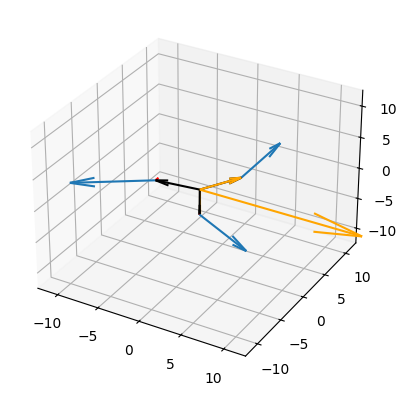

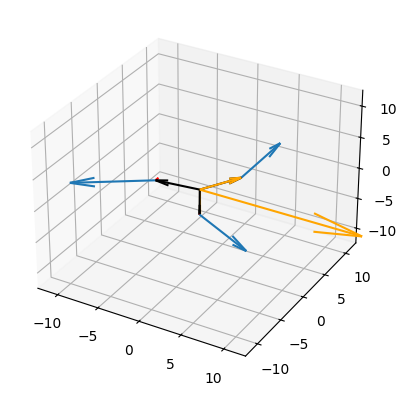

In [10]:
import matplotlib.pyplot as plt

%matplotlib inline

#def plot(c1, theta_c1, phi_c1, c2, theta_c2, phi_c2, c3, theta_c3, phi_c3, sp):
def plot(r1, theta1, phi1, r2, theta2, phi2, r3, theta3, phi3, sp):

    
    
    # Mirror curvature centers coordinates - perfect geometry
    c1 = RC1 - L * sqrt(3)/3;
    c2 = RC2 - L * sqrt(3)/3;
    c3 = RC3 - L * sqrt(3)/3;

    theta_c1, theta_c2, theta_c3 = [pi, -pi/3, pi/3];

    phi_c1, phi_c2, phi_c3 = [pi/2, pi/2, pi/2];

    origin = array([0,0,0])
    
    r10 = v(r1, theta1, phi1)
    r20 = v(r2, theta2, phi2)
    r30 = v(r3, theta3, phi3)
    
    sp1 = v(sp.Radius[0], sp.Theta[0], sp.Phi[0])
    sp2 = v(sp.Radius[1], sp.Theta[1], sp.Phi[1])   
    sp3 = v(sp.Radius[2], sp.Theta[2], sp.Phi[2])

    c10 = v(c1, theta_c1, phi_c1);
    c20 = v(c2, theta_c2, phi_c2);
    c30 = v(c3, theta_c3, phi_c3)
    
    # Vectors of the optical path sides in cartesian coordinates
    s12 = v(r2, theta2, phi2) - v(r1, theta1, phi1);
    s23 = v(r3, theta3, phi3) - v(r2, theta2, phi2);
    s31 = v(r1, theta1, phi1) - v(r3, theta3, phi3);

    # Vectors center -> spotring in cartesian coordinates 
    # (their lengths are Rci curvature radius)
    VRc1 = v(r1, theta1, phi1) - v(c1, theta_c1, phi_c1);
    VRc2 = v(r2, theta2, phi2) - v(c2, theta_c2, phi_c2);
    VRc3 = v(r3, theta3, phi3) - v(c3, theta_c3, phi_c3);

    # __________________________________________________________
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    # plot s12 s23 s31 
    ax.quiver(r20[0], r20[1], r20[2], s12[0], s12[1], s12[2])
    ax.quiver(r30[0], r30[1], r30[2], s23[0], s23[1], s23[2])
    ax.quiver(r10[0], r10[1], r10[2], s31[0], s31[1], s31[2])
    
    # plot r10, r20, r30
    ax.quiver(0,0,0, r10[0], r10[1], r10[2],color='k')
    ax.quiver(0,0,0, r20[0], r20[1], r20[2],color='k')
    ax.quiver(0,0,0, r30[0], r30[1], r30[2],color='k')

    # plot sp1 sp2 sp3
    ax.quiver(0,0,0, sp1[0], sp1[1], sp1[2],color='orange')
    ax.quiver(0,0,0, sp2[0], sp2[1], sp2[2],color='orange')
    ax.quiver(0,0,0, sp3[0], sp3[1], sp3[2],color='orange')

    # plot VRc1 VRc2 VRc3
    ax.quiver(c10[0],c10[1],c10[2], VRc1[0], VRc1[1], VRc1[2] ,color='red')
    ax.quiver(c20[0],c20[1],c20[2], VRc2[0], VRc2[1], VRc2[2],color='red')
    ax.quiver(c30[0],c30[1],c30[2], VRc3[0], VRc3[1], VRc3[2],color='red')

    ax.set_xlim([-12, 12])
    ax.set_ylim([-12, 12])
    ax.set_zlim([-12, 12])

    plt.show();


plot(rs1, ts1, ps1, rs2, ts2, ps2, rs3, ts3, ps3, Spot)
